In [1]:
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

- Alpaca api data:

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes (5 years)
start_date = pd.Timestamp("2017-11-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-11-01", tz="America/New_York").isoformat()

# ticker information
tickers = ["TSLA","SPY","XEL","AAPL","ESGU"]

# Get 5 year's worth of historical price data
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# sample data
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-11-17 05:00:00+00:00,171.04,171.39,169.6400,170.15,21900015,130140,170.393943,AAPL
2017-11-20 05:00:00+00:00,170.29,170.56,169.5600,169.98,16262789,95572,170.000606,AAPL
2017-11-21 05:00:00+00:00,170.78,173.70,170.7800,173.14,25131295,137407,172.945834,AAPL
2017-11-22 05:00:00+00:00,173.36,175.00,173.0500,174.96,25589080,130437,174.322524,AAPL
2017-11-24 05:00:00+00:00,175.10,175.50,174.6459,174.97,14446088,64847,175.096149,AAPL


In [5]:
# drop 'symbol' column
TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis = 1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis = 1)
XEL = df_ticker[df_ticker['symbol']=='XEL'].drop('symbol', axis = 1)
AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis = 1)
ESGU = df_ticker[df_ticker['symbol']=='ESGU'].drop('symbol', axis = 1)

# concat ticker columns together
df_ticker = pd.concat([TSLA, SPY, XEL, AAPL, ESGU],axis=1, keys=['TSLA','SPY','XEL','AAPL','ESGU'])
df_ticker.tail()

TSLA                                      \
                              open      high     low   close    volume   
timestamp                                                                
2022-10-26 04:00:00+00:00  219.400  230.6000  218.20  224.64  85275380   
2022-10-27 04:00:00+00:00  229.770  233.8100  222.85  225.09  61644674   
2022-10-28 04:00:00+00:00  225.400  228.8600  216.35  228.52  69040080   
2022-10-31 04:00:00+00:00  226.195  229.8500  221.94  227.54  61560070   
2022-11-01 04:00:00+00:00  234.050  237.3951  227.28  227.82  62689105   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-10-26 04:00:00+00:00      921830  226.572058  381.62  387.58  381.35   
2022-10-27 04:00:00+00:00      740945  226.138713  383.07  385.00  379.33   
2022-10-28 04:00:00+00:00      793069  224.185539  379.87  389.52  379.68   
2022-10-31 04:00:00+00:00      717792  226.621743  386.44  388.40  385.26   
2022-11-01 04:00:00+00:00      701489  230.789246  390.14  390.39  383.29   

                           ...       AAPL                           ESGU  \
                           ...     volume trade_count        vwap   open   
timestamp                  ...                                             
2022-10-26 04:00:00+00:00  ...   88834489      693414  150.040815  84.73   
2022-10-27 04:00:00+00:00  ...  109198287      944054  145.311760  85.07   
2022-10-28 04:00:00+00:00  ...  164513407     1226015  154.587167  84.27   
2022-10-31 04:00:00+00:00  ...   97925458      726580  153.279315  85.68   
2022-11-01 04:00:00+00:00  ...   80379345      650595  150.980742  86.57   

                                                                       \
                              high    low  close   volume trade_count   
timestamp                                                               
2022-10-26 04:00:00+00:00  86.1300  84.59  84.85  1521839       10038   
2022-10-27 04:00:00+00:00  85.5600  84.26  84.43  1514914        8738   
2022-10-28 04:00:00+00:00  86.4689  84.27  86.35   977578        6713   
2022-10-31 04:00:00+00:00  86.2800  85.57  85.75  2183872        6309   
2022-11-01 04:00:00+00:00  86.7037  85.18  85.42  2321629        5964   

                                      
                                vwap  
timestamp                             
2022-10-26 04:00:00+00:00  85.356688  
2022-10-27 04:00:00+00:00  84.797542  
2022-10-28 04:00:00+00:00  85.836537  
2022-10-31 04:00:00+00:00  85.899832  
2022-11-01 04:00:00+00:00  85.870217  

[5 rows x 35 columns]

In [6]:
# close price only
df_close = pd.DataFrame()
df_close["TSLA"] = df_ticker["TSLA"]["close"]
df_close["SPY"] = df_ticker["SPY"]["close"]
df_close["XEL"] = df_ticker["XEL"]["close"]
df_close["AAPL"] = df_ticker["AAPL"]["close"]
df_close["ESGU"] = df_ticker["ESGU"]["close"]
df_close


,TSLA,SPY,XEL,AAPL,ESGU
timestamp,,,,,
2017-11-17 05:00:00+00:00,315.05,257.87,50.89,170.15,56.509
2017-11-20 05:00:00+00:00,308.74,258.28,50.59,169.98,56.550
2017-11-21 05:00:00+00:00,317.81,259.93,50.61,173.14,56.900
2017-11-22 05:00:00+00:00,312.60,259.79,50.53,174.96,56.890
2017-11-24 05:00:00+00:00,315.55,260.37,50.71,174.97,57.000
...,...,...,...,...,...
2022-10-26 04:00:00+00:00,224.64,382.02,62.57,149.35,84.850
2022-10-27 04:00:00+00:00,225.09,379.98,63.25,144.80,84.430
2022-10-28 04:00:00+00:00,228.52,389.02,65.37,155.74,86.350


In [7]:
# percent change and drop nulls
df_pct_change = df_close.pct_change().dropna()
df_pct_change

,TSLA,SPY,XEL,AAPL,ESGU
timestamp,,,,,
2017-11-20 05:00:00+00:00,-0.020029,0.001590,-0.005895,-0.000999,0.000726
2017-11-21 05:00:00+00:00,0.029377,0.006388,0.000395,0.018590,0.006189
2017-11-22 05:00:00+00:00,-0.016393,-0.000539,-0.001581,0.010512,-0.000176
2017-11-24 05:00:00+00:00,0.009437,0.002233,0.003562,0.000057,0.001934
2017-11-27 05:00:00+00:00,0.003993,-0.000538,0.002958,-0.005029,0.000288
...,...,...,...,...,...
2022-10-26 04:00:00+00:00,0.010004,-0.007534,0.002724,-0.019627,-0.007254
2022-10-27 04:00:00+00:00,0.002003,-0.005340,0.010868,-0.030465,-0.004950
2022-10-28 04:00:00+00:00,0.015238,0.023791,0.033518,0.075552,0.022741


- FRED api data:

In [8]:
from fredapi import Fred

In [9]:
load_dotenv()
fred_api_key = os.getenv("fred_api_key")

In [10]:
# US10Y 
fred = Fred(fred_api_key)
data = fred.get_series('DGS10')
data

1962-01-02    4.06
1962-01-03    4.03
1962-01-04    3.99
1962-01-05    4.02
1962-01-08    4.03
              ... 
2022-11-04    4.17
2022-11-07    4.22
2022-11-08    4.14
2022-11-09    4.12
2022-11-10    3.82
Length: 15878, dtype: float64

In [11]:
# US10Y data from NOV 2017 - NOV 2022
data_ref =data.loc['2017-11-17':'2022-11-01'].dropna()
fred_df = pd.DataFrame(data_ref)
fred_df

,0
2017-11-17,2.35
2017-11-20,2.37
2017-11-21,2.36
2017-11-22,2.32
2017-11-24,2.34
...,...
2022-10-26,4.04
2022-10-27,3.96
2022-10-28,4.02
2022-10-31,4.10


- MC simulation:

In [16]:
from MCForecastTools import MCSimulation

In [17]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_1 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.2,.2,.2,.2,.2],
    num_simulation = 500,
    num_trading_days = 252*10)

In [18]:
MC_1.portfolio_data.head()

TSLA                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-11-17 05:00:00+00:00  325.67  326.67  313.15  315.05  13787039   
2017-11-20 05:00:00+00:00  313.79  315.50  304.75  308.74   8247753   
2017-11-21 05:00:00+00:00  310.86  318.23  308.71  317.81   7296732   
2017-11-22 05:00:00+00:00  316.77  317.42  311.84  312.60   4917636   
2017-11-24 05:00:00+00:00  313.79  316.41  311.00  315.55   3244065   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-11-17 05:00:00+00:00      136242  318.163279          NaN  258.22   
2017-11-20 05:00:00+00:00       81075  307.918540    -0.020029  258.14   
2017-11-21 05:00:00+00:00       69382  314.991916     0.029377  259.18   
2017-11-22 05:00:00+00:00       48176  313.721212    -0.016393  260.00   
2017-11-24 05:00:00+00:00       30179  314.339344     0.009437  260.32   

                                     ...        AAPL                  ESGU  \
                               high  ...        vwap daily_return     open   
timestamp                            ...                                     
2017-11-17 05:00:00+00:00  258.5882  ...  170.393943          NaN  56.5500   
2017-11-20 05:00:00+00:00  258.5250  ...  170.000606    -0.000999  56.6600   
2017-11-21 05:00:00+00:00  260.2000  ...  172.945834     0.018590  56.7897   
2017-11-22 05:00:00+00:00  260.1500  ...  174.322524     0.010512  56.9000   
2017-11-24 05:00:00+00:00  260.4800  ...  175.096149     0.000057  56.8950   

                                                                       \
                             high      low   close volume trade_count   
timestamp                                                               
2017-11-17 05:00:00+00:00  56.585  56.4421  56.509   3057          24   
2017-11-20 05:00:00+00:00  56.660  56.5100  56.550   8575          49   
2017-11-21 05:00:00+00:00  56.910  56.7500  56.900   5409          30   
2017-11-22 05:00:00+00:00  56.900  56.8350  56.890   1893          19   
2017-11-24 05:00:00+00:00  57.000  56.8810  57.000   3373          25   

                                                   
                                vwap daily_return  
timestamp                                          
2017-11-17 05:00:00+00:00  56.529770          NaN  
2017-11-20 05:00:00+00:00  56.586540     0.000726  
2017-11-21 05:00:00+00:00  56.858212     0.006189  
2017-11-22 05:00:00+00:00  56.871652    -0.000176  
2017-11-24 05:00:00+00:00  56.930960     0.001934  

[5 rows x 40 columns]

In [19]:
# run simulation
MC_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/adam/Desktop/Team-3-Repo/MCForecastTools.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988650,0.991114,0.998481,0.999216,0.983011,1.010102,0.992696,1.005644,0.991324,1.024555,...,0.993465,0.980136,0.974635,0.984559,1.016805,1.003880,1.026154,1.019943,1.002188,1.012793
2,0.993171,0.995658,0.997007,1.002769,0.954147,0.988790,0.992715,1.019447,0.979321,0.992204,...,0.980214,0.968647,0.964892,0.991122,1.034172,1.025241,1.003763,1.020201,0.991927,1.015520
3,1.003217,0.978857,0.978988,1.002592,0.960222,0.993715,1.011394,1.027939,0.990351,0.982858,...,0.986409,0.978778,0.964822,0.993228,1.009248,1.012020,0.990685,1.028903,0.989733,1.021751
4,1.001214,0.985996,0.966363,1.018692,0.979622,1.011066,1.023049,1.027485,0.990157,0.978602,...,0.989076,0.992803,0.958699,0.988267,1.012577,1.021527,1.000329,1.035584,0.999869,1.029265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.615916,3.276417,8.418872,2.176470,4.333637,2.778550,9.010926,4.978807,5.560269,2.654199,...,8.546607,5.451448,3.793268,1.664026,4.873230,4.394907,4.860089,4.133932,3.696946,1.709176
2517,5.608883,3.288748,8.504711,2.178406,4.400452,2.791569,8.943377,4.918296,5.570661,2.672867,...,8.686957,5.469948,3.806324,1.677795,4.946035,4.342672,4.741337,4.212813,3.699362,1.711377
2518,5.538309,3.322023,8.469763,2.160078,4.416746,2.697096,9.037907,5.042528,5.647125,2.652322,...,8.610230,5.578344,3.820640,1.659592,4.892071,4.296418,4.791668,4.183958,3.720166,1.702298
2519,5.490697,3.279202,8.543195,2.117584,4.399425,2.710077,8.999825,5.066882,5.680268,2.619192,...,8.587965,5.585557,3.801390,1.682151,4.870490,4.281895,4.771896,4.191241,3.767190,1.714558


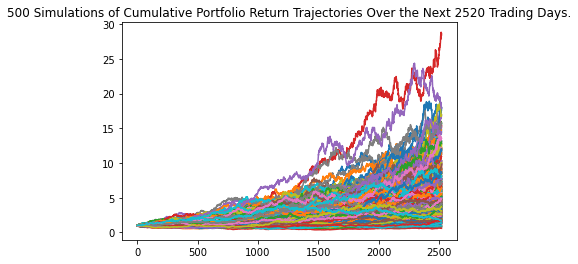

In [20]:
# plot simulation
line_plot = MC_1.plot_simulation()

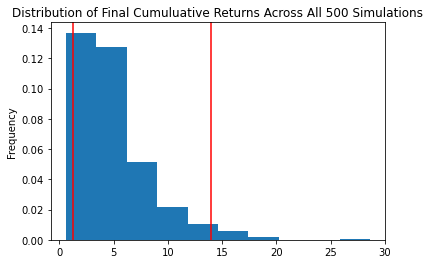

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_1.plot_distribution()

In [22]:
# Summary statistics from the Monte Carlo simulation results
tbl_ = MC_1.summarize_cumulative_return()

print(tbl_)

count           500.000000
mean              5.050477
std               3.360516
min               0.595052
25%               2.773230
50%               4.150876
75%               6.297139
max              28.626265
95% CI Lower      1.299114
95% CI Upper     14.003065
Name: 2520, dtype: float64


In [23]:
# Initial investment
initial_investment = 100000

# Lower and upper `95%` confidence intervals
ci_lower = round(tbl_[8]*initial_investment,2)
ci_upper = round(tbl_[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment}"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")



There is a 95% chance that an initial investment of $100000 over the next 10 years will end within the range of $129911.35 and $1400306.46
